In [1]:
import torch
import random
import numpy as np

#random.seed(0)
#np.random.seed(0)
#torch.manual_seed(0)
#torch.cuda.manual_seed(0)
#torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [5]:
X_train = X_train.float()
X_test = X_test.float()

In [6]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [7]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

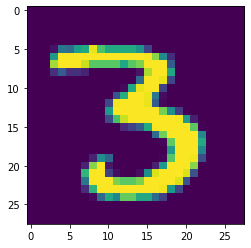

tensor(3)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12, :, :])
plt.show()
print(y_train[12])

In [9]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [10]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [11]:
torch.cuda.is_available()

True

In [12]:
!nvidia-smi

Sun Feb 21 17:19:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0354,  0.0007,  0.0165,  ...,  0.0072,  0.0013, -0.0296],
         [ 0.0156, -0.0134, -0.0186,  ...,  0.0106,  0.0192, -0.0328],
         [ 0.0196, -0.0238, -0.0081,  ..., -0.0346, -0.0123,  0.0308],
         ...,
         [-0.0349,  0.0250,  0.0116,  ...,  0.0033, -0.0087,  0.0302],
         [ 0.0165, -0.0315, -0.0017,  ..., -0.0340, -0.0102,  0.0225],
         [ 0.0198,  0.0061, -0.0289,  ..., -0.0240, -0.0170,  0.0064]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([ 0.0092, -0.0095, -0.0141,  0.0086, -0.0162, -0.0249,  0.0052, -0.0191,
          0.0261, -0.0175, -0.0356,  0.0325, -0.0264, -0.0099, -0.0060,  0.0335,
          0.0049, -0.0121,  0.0259,  0.0356,  0.0334,  0.0113, -0.0249, -0.0259,
         -0.0002, -0.0294, -0.0160,  0.0247,  0.0030,  0.0165, -0.0242,  0.0103,
          0.0028, -0.0269, -0.0012,  0.0089, -0.0217,  0.0116,  0.0086, -0.0215,
          0.0128, -0.0136, -0.0103,  0.0040, -0.0067,  0.0209, 

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [15]:
batch_size = 1000

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.8872, device='cuda:0')
tensor(0.9101, device='cuda:0')
tensor(0.9233, device='cuda:0')
tensor(0.9281, device='cuda:0')
tensor(0.9296, device='cuda:0')
tensor(0.9350, device='cuda:0')
tensor(0.9343, device='cuda:0')
tensor(0.9394, device='cuda:0')
tensor(0.9401, device='cuda:0')
tensor(0.9421, device='cuda:0')
tensor(0.9452, device='cuda:0')
tensor(0.9447, device='cuda:0')
tensor(0.9455, device='cuda:0')
tensor(0.9462, device='cuda:0')
tensor(0.9483, device='cuda:0')
tensor(0.9517, device='cuda:0')
tensor(0.9515, device='cuda:0')
tensor(0.9486, device='cuda:0')
tensor(0.9502, device='cuda:0')
tensor(0.9527, device='cuda:0')
tensor(0.9564, device='cuda:0')
tensor(0.9521, device='cuda:0')
tensor(0.9534, device='cuda:0')
tensor(0.9535, device='cuda:0')
tensor(0.9561, device='cuda:0')
tensor(0.9535, device='cuda:0')
tensor(0.9543, device='cuda:0')
tensor(0.9572, device='cuda:0')
tensor(0.9581, device='cuda:0')
tensor(0.9574, device='cuda:0')
tensor(0.9559, device='cuda:0')
tensor(0

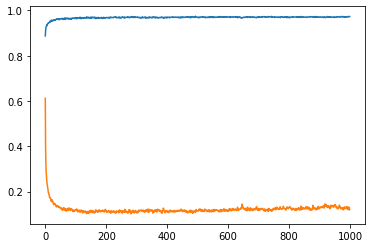

In [16]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);